In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
iris = datasets.load_iris()
iris_X = iris.data
iris_Y = iris.target

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(iris_X, iris_Y, random_state = 4)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [13]:
print(knn.score(X_test, Y_test))

0.9736842105263158


In [18]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [22]:
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    loss = - cross_val_score(knn, iris_X, iris_Y, cv = 10, scoring = 'neg_mean_squared_error')
    #scores = cross_val_score(knn, iris_X, iris_Y, cv = 10, scoring = 'accuracy')
    k_scores.append(loss.mean())

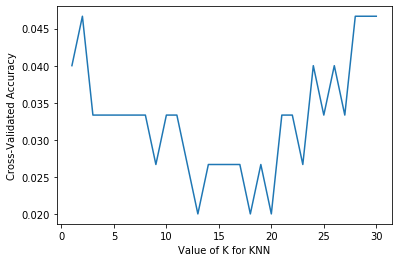

In [23]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [24]:
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [25]:
digits = load_digits()
X = digits.data
y = digits.target

In [28]:
train_sizes, train_loss, test_loss = learning_curve(
    SVC(gamma = 0.1), X, y, cv = 10, scoring = 'neg_mean_squared_error', 
    train_sizes = [0.1, 0.25, 0.5, 0.75, 1])
train_loss_mean = - np.mean(train_loss, axis = 1)
test_loss_mean = - np.mean(test_loss, axis = 1)

No handles with labels found to put in legend.


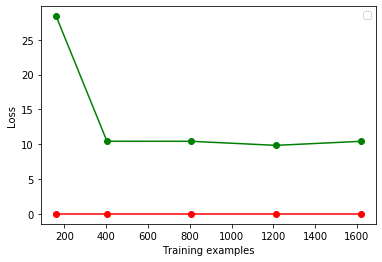

In [29]:
plt.plot(train_sizes, train_loss_mean, 'o-', color = 'r')
plt.plot(train_sizes, test_loss_mean, 'o-', color = 'g')
plt.xlabel('Training examples')
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.show()

In [30]:
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [32]:
digits = load_digits()
X = digits.data
y = digits.target
param_range = np.logspace(-6, -2.3, 5)

In [36]:
train_loss, test_loss = validation_curve(
    SVC(), X, y, param_name = 'gamma', param_range = param_range, 
    cv = 10, scoring = 'neg_mean_squared_error', )
train_loss_mean = - np.mean(train_loss, axis = 1)
test_loss_mean = - np.mean(test_loss, axis = 1)

No handles with labels found to put in legend.


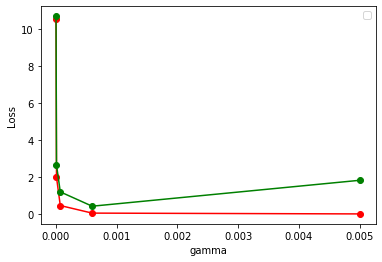

In [37]:
plt.plot(param_range, train_loss_mean, 'o-', color = 'r')
plt.plot(param_range, test_loss_mean, 'o-', color = 'g')
plt.xlabel('gamma')
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.show()